Temperatura estimada para el día 1: 28.25 °C
Temperatura estimada para el día 2: 25.0 °C
Temperatura estimada para el día 3: 23.25 °C
Temperatura estimada para el día 4: 23.0 °C
Temperatura estimada para el día 5: 24.25 °C
Temperatura estimada para el día 6: 27.0 °C
Temperatura estimada para el día 7: 31.25 °C


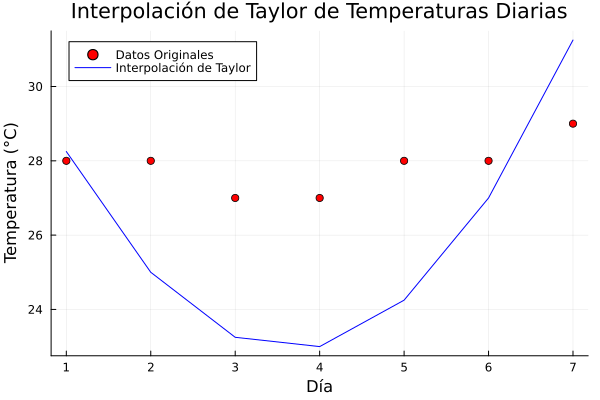

In [4]:
using Plots

# Supongamos que estas son las temperaturas diarias en grados Celsius
temperaturas_diarias = [22, 24, 23, 25, 24, 26, 27]
# Seleccionamos el día 4 como el punto central
dia_central = 4
temperatura_central = temperaturas_diarias[dia_central - 1]

# Estimamos las derivadas usando diferencias finitas
# Para este ejemplo, usaremos diferencias hacia adelante y hacia atrás
f_prima = (temperaturas_diarias[dia_central] - temperaturas_diarias[dia_central - 2]) / 2
f_doble_prima = (temperaturas_diarias[dia_central] - 2 * temperatura_central + temperaturas_diarias[dia_central - 2]) / 2

# Función de interpolación de Taylor
function interpolacion_taylor(x)
    # x es el día para el cual queremos estimar la temperatura
    return temperatura_central + f_prima * (x - dia_central) + f_doble_prima * (x - dia_central)^2 / 2
end

# Usamos la función para estimar la temperatura en los días 1 al 7
for dia in 1:7
    temperatura_estimada = interpolacion_taylor(dia)
    println("Temperatura estimada para el día $dia: $(round(temperatura_estimada, digits=2)) °C")
end

# Datos de temperatura media para los primeros 7 días
temperaturas_media = [28, 28, 27, 27, 28, 28, 29]

# Generamos puntos para la gráfica de la interpolación
dias = 1:7
temperaturas_interpoladas = [interpolacion_taylor(dia) for dia in dias]

# Graficamos los datos originales
p = plot(dias, temperaturas_media, seriestype=:scatter, color=:red, label="Datos Originales")

# Graficamos la interpolación de Taylor
plot!(dias, temperaturas_interpoladas, color=:blue, label="Interpolación de Taylor")

# Añadimos título y leyenda al gráfico
title!("Interpolación de Taylor de Temperaturas Diarias")
xlabel!("Día")
ylabel!("Temperatura (°C)")
p = plot!(legend=:topleft)  # <--- Cambia aquí

# Mostramos el gráfico
display(p)  # <--- Agregamos esta línea para mostrar el gráfico